In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500

C:\Users\maslo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Загрузим датасет с машинами. Цель - верно восстанавливать для каждой из них цену продажи!

In [2]:
data = pd.read_csv('C:/Users/maslo/Desktop/karpov_start_ml/2_module/18_lesson/materials/autos.csv')

data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
### Колонка с тергетом - "selling price"

X = data.drop("selling_price", axis=1)
y = data["selling_price"]

### Будем замерять MSLE!
### Поэтому прологарифмируем таргет
### А после оптимизируем MSE

y = y.apply(np.log1p)

In [4]:
### Разделим выборку на трейн и тест!

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

__Задание__ 

Реализуйте свой MeanTargetEncoder с добавленем некоторого шума!

Однажды в лекционном материале, обсуждая счетчики, мы говорили с вами о том, что из-за них модели могут переобучаться. Один из способов бороться с этим - валидировать расчеты среднего таргета (стратегия отложенной выборки / расчеты на кросс-валидации). Но есть еще проще!

Можно просто к значению счетчика добавить случайный шум (зашумить данные)!

Напомним, что рассчитываться новые признаки должны по такой формуле:

$$
g_j = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}{l} + C * \epsilon
$$



Пусть шум будет случайной величиной из нормального стандартного распределения, то есть $\epsilon \sim N(0, 1) $, а $ C = 0.006$.

Создавая свой класс-трансформер, наследуйтесь от классов `BaseEstimator, TransformerMixin` из `sklearn.base`. Трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики нужно считать только по обучающей выборке в методе `fit`. Ваш трансформер должен принимать при инициализации список из категориальных признаков и список из числовых признаков. 

Если для какого-то признака в тестовой выборке отсутствует значение, трансформер должен поставить там 0.

На выходе должен получиться датасет того же размера с измененными категориальными признаками.

Класс MeanTargetEncoderNoise должен иметь следующую сигнатуру:



In [5]:
from sklearn.base import BaseEstimator, TransformerMixin

class MeanTargetEncoderNoise(BaseEstimator, TransformerMixin):
    
    def __init__(self, categorical, numeric):              
        ### Your code is here
    
    def fit(self, X, y):
        ### Your code is here

        return self
        
    def transform(self, df):
        ### Your code is here
        
        return temp

IndentationError: expected an indented block (<ipython-input-5-bd75101a7fe2>, line 8)

Разделите колонки на вещественные и категориальные. Приведите все категориальные колонки к типу `object`.

Далее применим наш кодировщик к `X_train, X_test`, так же как например мы применяем `StandardScaler`, чтобы проверить работоспособность нашего класса. Установите зерно датчика случайный чисел `np.random.seed(1)`.

После того, как вы изменили обучающую и тестовую выборки, сохраните первые 10 строк полученного промежуточного датафрейма обучающей выборки (`X_train`) в файл в формате csv с сепаратором `;`. Не забудьте индекс. Отправьте полученный файл в форму ниже.

Список колонок которые должны быть в файле для сдачи:
```py
cols = [
    "km_driven",
    "name",
    "year",
    "fuel",
    "seller_type",
    "transmission",
    "owner"
]
```

In [8]:
X_train.dtypes

name            object
year             int64
km_driven        int64
fuel            object
seller_type     object
transmission    object
owner           object
dtype: object

In [11]:
X_train[['year']].astype('object').dtypes

year    object
dtype: object

In [15]:
X_train.groupby('name')['km_driven'].mean()['Ambassador CLASSIC 1500 DSL AC']

50000.0

In [19]:
X_train.groupby('name')['km_driven'].mean() + np.random.normal(loc=0, scale=1, size=1331)

name
Ambassador CLASSIC 1500 DSL AC           50000.232430
Ambassador Grand 1800 ISZ MPFI PW CL     50000.894407
Audi A4 1.8 TFSI                         60000.702624
Audi A4 2.0 TDI                          58000.714184
Audi A4 2.0 TDI 177 Bhp Premium Plus     53000.188843
                                            ...      
Volkswagen Vento Petrol Highline AT      73129.559065
Volvo V40 D3 R Design                    21000.182143
Volvo XC 90 D5 Inscription BSIV          80000.405077
Volvo XC60 D3 Kinetic                   115990.402983
Volvo XC60 D5 Inscription               130000.165900
Name: km_driven, Length: 1331, dtype: float64

### Ваше решение


Разделение колонок на категориальные и числовые.

In [6]:
object_cols = ['name', 'year', 'fuel', 'seller_type', 'transmission', 'owner']
num_cols = ['km_driven']

X.head()

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner


In [24]:
X.columns

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner'],
      dtype='object')

Реализация класса MeanTargetEncoderNoise.

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

class MeanTargetEncoderNoise(BaseEstimator, TransformerMixin):
    
    def __init__(self, categorical, numeric):
        self.categorical = categorical
        self.numeric = numeric
        self.temp = None
        self.dict_of_means = {}
        
    def fit(self, X, y):
        self.temp = X.copy()
        self.y = y.copy()
        self.temp['target'] = self.y
        
        for col in self.categorical:
            self.temp[col] = self.temp[col].astype('object')
            means = self.temp.groupby(col)['target'].mean()
            self.dict_of_means[col] = means + np.random.normal(loc=0, scale=1, size=len(means)) * 0.006
        
        self.temp = None
        self.y = None
        
        return self
        
    def transform(self, df):
        self.temp = df.copy()
        for col in self.categorical:
            if col not in list(self.temp.columns):
                self.temp[col] = 0
            else:
                self.temp[col] = self.temp[col].astype('object')
                self.temp[col] = self.temp[col].map(self.dict_of_means[col]).fillna(0)
            
        self.temp = self.temp[self.categorical + self.numeric]
        
        return self.temp

Проверка работы трансформера.

In [40]:
np.random.seed(1)
transformer = MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)

transformer.fit(X_train, y_train)

train = transformer.transform(X_train)
test = transformer.transform(X_test)

train.head(10).to_csv('C:/Users/maslo/Desktop/karpov_start_ml/2_module/18_lesson/materials/res.csv', sep=';', index=False)

In [41]:
train.name.nunique()

1331

In [42]:
X_train.name.nunique()

1331

In [43]:
X_train

,name,year,km_driven,fuel,seller_type,transmission,owner
3294,Maruti Swift Dzire AMT VDI,2018,50000,Diesel,Individual,Automatic,First Owner
2290,Honda City 1.5 V AT,2008,70000,Petrol,Individual,Automatic,First Owner
874,Maruti Alto 800 LXI,2017,50000,Petrol,Individual,Manual,First Owner
1907,Datsun GO T Petrol,2015,92198,Petrol,Dealer,Manual,Second Owner
3244,Hyundai EON Era Plus,2013,3240,Petrol,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
2895,Maruti Zen Estilo LXI BSIII,2008,40000,Petrol,Individual,Manual,First Owner
2763,Hyundai Grand i10 1.2 Kappa Asta,2019,15000,Petrol,Individual,Manual,First Owner
905,Maruti Ertiga VXI,2015,11918,Petrol,Trustmark Dealer,Manual,First Owner
3980,Hyundai Creta 1.6 CRDi SX Option,2015,90000,Diesel,Individual,Manual,Second Owner


Обучите несколько деревьев, перебирая максимальную глубину алгоритма из списка `max_depth_list`, а остальные параметры оставьте дефолтными. Выведите лучшее значение гиперпараметра. Постройте график зависимости MSLE на тестовой выборке от значения гиперпараметра. Воспользуйтесь `Pipeline` без `GridSearch`. Проделайте то же самое с `min_samples_split`, `min_impurity_decrease`, `max_leaf_nodes`. (по 2б на каждый параметр)

In [44]:
max_depth_list = [3, 5, 8, 12]
min_samples_split_list = [10, 50, 100, 500]
min_impurity_decrease_list = [0, 0.1, 0.15, 0.2]
max_leaf_nodes_list = [100, 200, 500]

In [62]:
model = DecisionTreeRegressor()

In [63]:
model.__dict__

{'criterion': 'squared_error',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0}

('max_depth', 3, 0.06642159272072744, 0.7978271003064105)
('max_depth', 5, 0.04284638465769521, 1.4407231108105147)
('max_depth', 8, 0.02875216751362373, 1.9875843849579033)
('max_depth', 12, 0.012320349608430333, 1.9825494414825622)
('min_samples_split', 10, 0.014915532158984508, 1.4336121777733646)
('min_samples_split', 50, 0.03080067950948789, 1.4381802535260284)
('min_samples_split', 100, 0.03844864861545278, 0.9522201881004299)
('min_samples_split', 500, 0.07464275340074786, 0.8079648572218957)
('min_impurity_decrease', 0, 0.00032966498251793574, 1.9874642247574532)
('min_impurity_decrease', 0.1, 0.2858966254197726, 0.5193064743059796)
('min_impurity_decrease', 0.15, 0.2858884391907183, 0.5204871413036579)
('min_impurity_decrease', 0.2, 0.28589501550762514, 0.5196554863225696)
('max_leaf_nodes', 100, 0.03146357292857453, 1.9880645922715214)
('max_leaf_nodes', 200, 0.02445085847792548, 1.9855110357781376)
('max_leaf_nodes', 500, 0.012107283780796785, 1.9858955894450092)


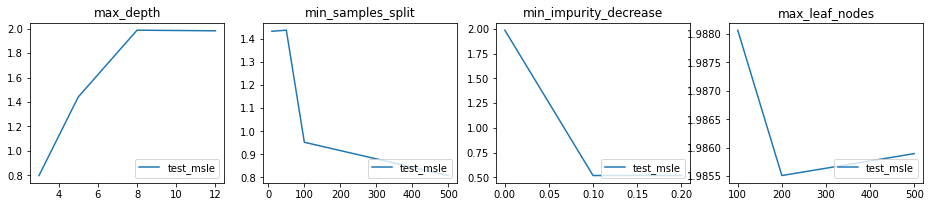

In [79]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
import math

np.random.seed(1)

fig = plt.figure()
fig.set_size_inches(16, 10)

param_list = [
    ('max_depth', max_depth_list),
    ('min_samples_split', min_samples_split_list),
    ('min_impurity_decrease', min_impurity_decrease_list),
    ('max_leaf_nodes', max_leaf_nodes_list)
]

graph_count = len(max_depth_list) + \
              len(min_samples_split_list) + \
              len(min_impurity_decrease_list) + \
              len(max_leaf_nodes_list)
graph_cols = 4 
graph_rows = math.ceil(graph_count // graph_cols)

i = 1
for param in param_list:
    param_name = param[0]
    param_vals = param[1]
    param_msle = []
    for param_val in param_vals:
        model_params = {param_name: param_val}
        model = DecisionTreeRegressor(**model_params)
        pipe = Pipeline([('transform', MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)), 
                         ('model', model)])
        pipe.fit(X_train, y_train)
        param_msle.append((param_val, mse(y_train, pipe.predict(X_train)), mse(y_test, pipe.predict(X_test))))
        print((param_name, param_val, mse(y_train, pipe.predict(X_train)), mse(y_test, pipe.predict(X_test))))
    param_msle = pd.DataFrame(param_msle, columns=[param_name, 'train_msle', 'test_msle'])
    ax = plt.subplot(graph_rows, graph_cols, i)
    i += 1
    ax.plot(param_msle[param_name], param_msle['test_msle'], label='test_msle')
    ax.set_title(param_name)
    plt.legend(loc = 'lower right', prop={'size': 10})

Подберите лучшую комбинацию параметров, используя `GridSearchCV` и набор массивов значений параметров из предыдущего задания. Для лучшей комбинации посчитайте MSLE на тестовой выборке. Получились ли лучшие параметры такими же, как если бы вы подбирали их по-отдельности при остальных гиперпараметрах по умолчанию (предыдущее задание)? (2б)

In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "decision_tree__max_depth": [3, 5, 8, 12],
    "decision_tree__min_samples_split": [10, 50, 100, 500],
    "decision_tree__min_impurity_decrease": [0, 0.1, 0.15, 0.2],
    "decision_tree__max_leaf_nodes": [100, 200, 500]
}
np.random.seed(1)

pipe = Pipeline([('transform', MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)), 
                 ('decision_tree', DecisionTreeRegressor())])
search = GridSearchCV(pipe, param_grid)
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        MeanTargetEncoderNoise(categorical=['name',
                                                                            'year',
                                                                            'fuel',
                                                                            'seller_type',
                                                                            'transmission',
                                                                            'owner'],
                                                               numeric=['km_driven'])),
                                       ('decision_tree',
                                        DecisionTreeRegressor())]),
             param_grid={'decision_tree__max_depth': [3, 5, 8, 12],
                         'decision_tree__max_leaf_nodes': [100, 200, 500],
                         'decision_tree__min_impurity_decrease': [0, 0

In [90]:
search.best_params_

{'decision_tree__max_depth': 12,
 'decision_tree__max_leaf_nodes': 200,
 'decision_tree__min_impurity_decrease': 0.1,
 'decision_tree__min_samples_split': 100}

In [91]:
pipe = Pipeline([('transform', MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)), 
                 ('decision_tree', DecisionTreeRegressor(
                     **{'max_depth': 12,
                        'max_leaf_nodes': 200,
                        'min_impurity_decrease': 0.1,
                        'min_samples_split': 100}
                 ))])

In [92]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 MeanTargetEncoderNoise(categorical=['name', 'year', 'fuel',
                                                     'seller_type',
                                                     'transmission', 'owner'],
                                        numeric=['km_driven'])),
                ('decision_tree',
                 DecisionTreeRegressor(max_depth=12, max_leaf_nodes=200,
                                       min_impurity_decrease=0.1,
                                       min_samples_split=100))])

In [93]:
mse(y_test, pipe.predict(X_test))

0.520128498179014